In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error


In [2]:
df = pd.read_csv("jamboree_admission.csv")

In [4]:
#Exploratory Data Analysis(EDA)
print("Dataset Information:\n")
print(df.info())
print("\nSummary Statistics:\n")
print(df.describe())

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB
None

Summary Statistics:

       Serial No.   GRE Score  TOEFL Score  University Rating         SOP  \
count  500.000000  500.000000   500.000000         500.000000  500.000000   
mean   250.500000  316.472000   107.192000           3.114000    3.374000   
std    144.481833   11.295148     6.0

In [5]:
df.drop("Serial No.", axis=1, inplace=True)

In [6]:
print("\nMissing Values:\n", df.isnull().sum())



Missing Values:
 GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


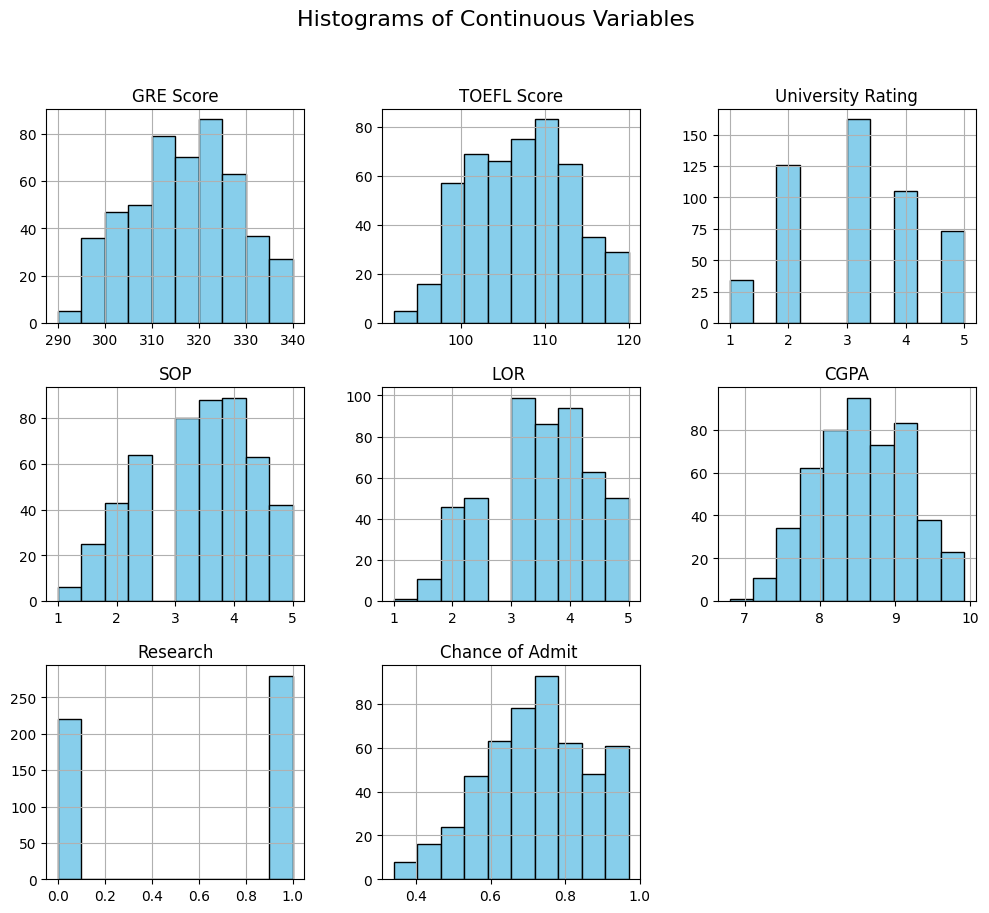

In [7]:
df.hist(figsize=(12, 10), bins=10, color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
plt.show()

<ipython-input-8-a71e1c906e3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Research", data=df, palette="viridis")


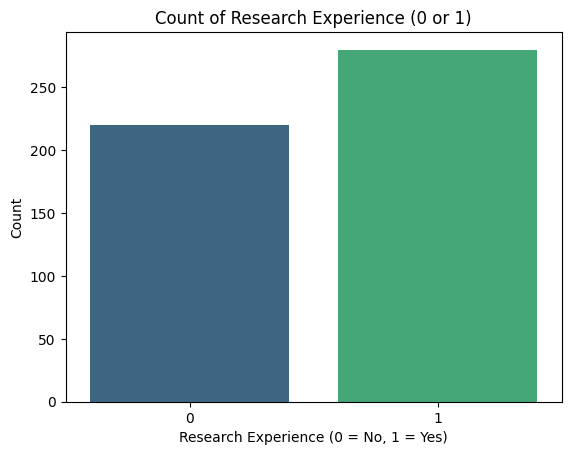

In [8]:
# Research Experience Bar Plotting:
sns.countplot(x="Research", data=df, palette="viridis")
plt.title("Count of Research Experience (0 or 1)")
plt.xlabel("Research Experience (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


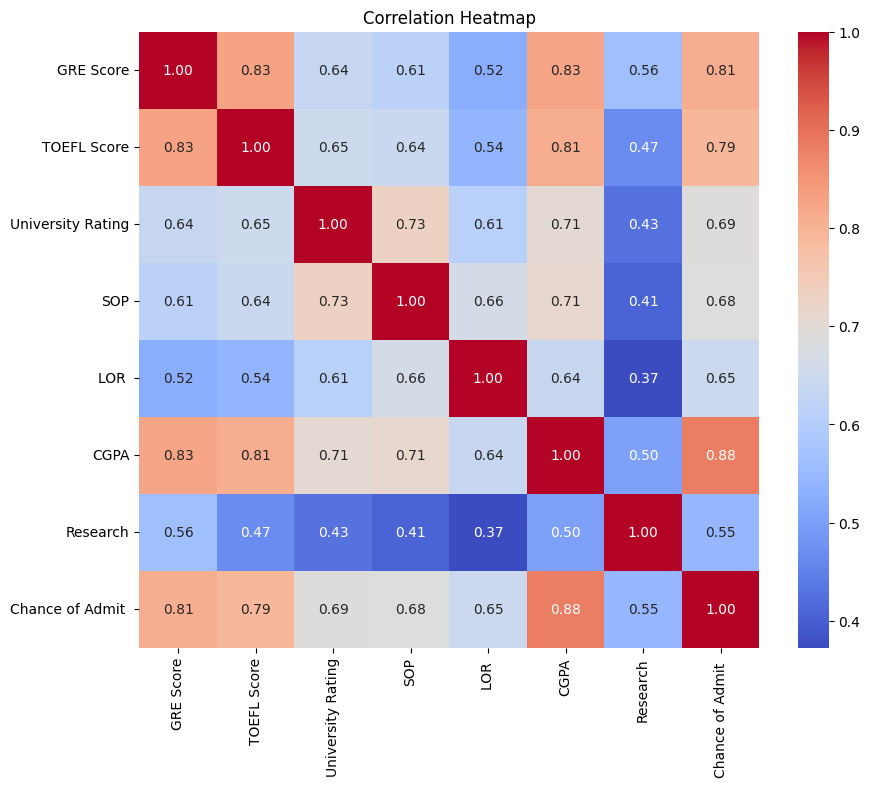

In [9]:
# Bivariate Analysis:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [10]:
GRE_column = "GRE Score"
TOEFL_column = "TOEFL Score"
CGPA_column = "CGPA"
Chance_column = "Chance of Admit "

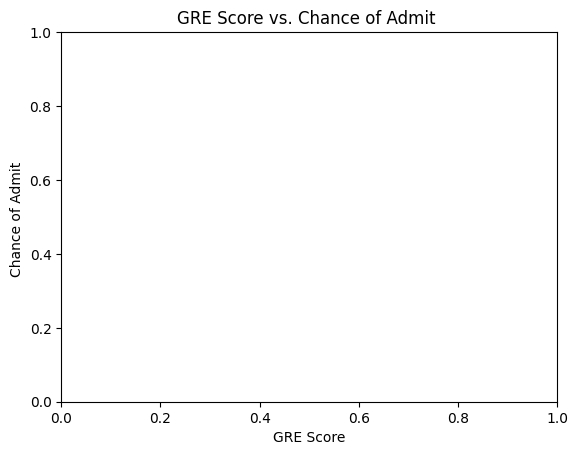

In [11]:
# Scatterplot for GRE Score vs. Chance of Admitsns.scatterplot(x=GRE_column, y=Chance_column, data=df, color="blue")
plt.title(f"{GRE_column} vs. {Chance_column}")
plt.xlabel(GRE_column)
plt.ylabel(Chance_column)
plt.show()


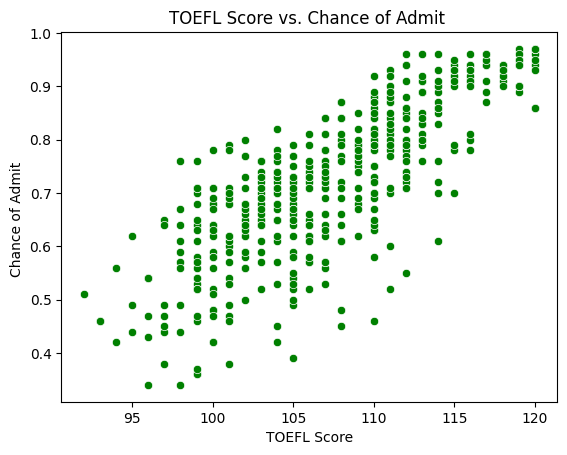

In [12]:
# Scatterplot for TOEFL Score vs. Chance of Admit
sns.scatterplot(x=TOEFL_column, y=Chance_column, data=df, color="green")
plt.title(f"{TOEFL_column} vs. {Chance_column}")
plt.xlabel(TOEFL_column)
plt.ylabel(Chance_column)
plt.show()

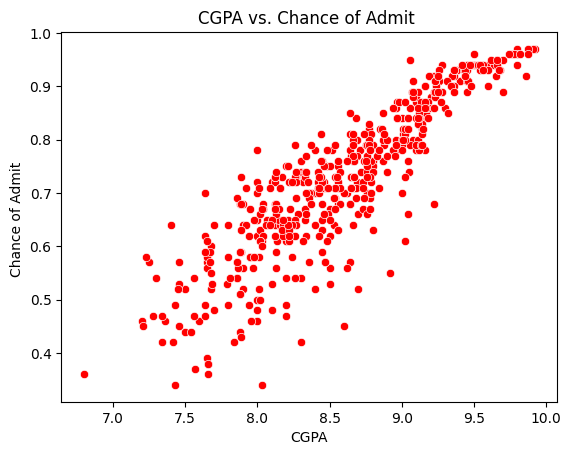

In [13]:
# Scatterplot for CGPA vs. Chance of Admit
sns.scatterplot(x=CGPA_column, y=Chance_column, data=df, color="red")
plt.title(f"{CGPA_column} vs. {Chance_column}")
plt.xlabel(CGPA_column)
plt.ylabel(Chance_column)
plt.show()


In [14]:
#data preprocessing:
X = df.drop("Chance of Admit ", axis=1)
y = df["Chance of Admit "]
#splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split successfully!")

Data split successfully!


In [15]:
lR = LinearRegression()
lR.fit(X_train, y_train)


LinearRegression()

In [19]:
print("\nLinear Regression Coefficients:\n")
for col, coef in zip(X.columns, lR.coef_):
    print(f"{col}: {coef:.3f}")
print(f"Intercept: {lR.intercept_:.3f}")


Linear Regression Coefficients:

GRE Score: 0.002
TOEFL Score: 0.003
University Rating: 0.003
SOP: 0.002
LOR : 0.017
CGPA: 0.113
Research: 0.024
Intercept: -1.421


In [21]:
#Evaluation and prediction:
y_pred = lR.predict(X_test)
print("\nLinear Regression Model Performance:")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred, squared=False):.3f}")



Linear Regression Model Performance:
R² Score: 0.819
RMSE: 0.061


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
#trying_Ridge and Lasso Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)


In [23]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [24]:
# Ridge Regression Performance
print("\nRidge Regression Performance:")
print(f"R² Score: {ridge.score(X_test, y_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_ridge, squared=False):.3f}")


Ridge Regression Performance:
R² Score: 0.818
RMSE: 0.061


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [25]:
# Lasso Regression Performance
print("\nLasso Regression Performance:")
print(f"R² Score: {lasso.score(X_test, y_test):.3f}")
print(f"RMSE: {mean_squared_error(y_test, y_pred_lasso, squared=False):.3f}")


Lasso Regression Performance:
R² Score: 0.637
RMSE: 0.086


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#end